<a href="https://colab.research.google.com/github/teator/FinEng/blob/main/MLiF/Copy_of_gw1_WQU_MLiF_GroupWork_sub1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---   ---   ---   ---   ---   ---   ---
# WorldQuant University  
##  (19/11) MScFE 650 Machine Learning in Finance (C18-S4)
## Group work Assignment  \ :: \  Timezone Group 2-A  \ :: \ Submission 1

Tea Toradze

November 2019

---   ---   ---   ---   ---   ---   ---

## **Submission 1 instructions**

**Submission 1 instruction (original pdf version):**

Raw tick data is hard to come by, but it is essential that you practice some of the techniques
taught in Module 7. All students are required to download a set of raw tick data and create
financial data structures. All students are required to download this [set of raw tick data](https://github.com/Jackal08/financial-data-structures/tree/master/raw_tick_data), containing 20 days of S&P500 E-mini features, and use it to create financial data structures. It is certainly possible for you to use this dataset for Submission 1; then, for Submissions 2 and 3, end-of-day data from Yahoo and Google Finance. However, it would be ideal to use the same
tick data from start to finish. Students should consider [cryptocurrencies](http://api.bitcoincharts.com/v1/csv/) because their tick
data is more readily available and usually has longer timeframes.

The following questions were sourced from Chapter 2 of the textbook *Advances in Financial Machine Learning* (2018) by Dr Marcos Lopéz de Prado.

On a series of raw tick data:

1. Create tick, volume, and dollar bars. (Bar must have open, high, low, and close values.) Students can do this from first principles or clone the following [repo](https://github.com/Jackal08/financial-data-structures) for an implementation.

2. Count the number of bars produced by tick, volume, and dollar bars on a weekly basis. Plot the time series of the bar count. What bar type produces the most stable weekly count? And why?

3. Compute the serial correlation of each bar type and report back on which method has the lowest serial correlation.

4. Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?


Write a 500-word report on your findings and research. Make sure to use the Harvard reference style.


**Submission 1 instruction (simplified update):**  

Students are required to select data for analysis and implement basic statistics and econometric tests.

Types of data: Fixed time interval data (ex: adjusted closing price data from Yahoo Finance) or raw tick data as indicated by de Prado (2018) in his book ‘Advances in Financial Machine Learning’.  

Asset types: any financial asset (FX, stock, cryptocurrencies, commodity futures etc)

Data source:
* Yahoo Finance
* Google Finance
* FRED database
* Mlfinlab package
* Any other reliable source like Central Banks’ websites

Students are requested to:
* Calculate mean and standard deviation
* Implement technical indicators (moving average, EWMA)
* Identify structural breaks
* Apply Bera-Jarque test for returns
* Apply a cointegration test. You can use macroeconomic variables or sentiment indicators in the required test
* Forecast next period $(t+1)$ asset return evolution using $AR(1)$ model
* Provide line charts


## **Solution**

---   ---   ---   ---   ---   ---   ---
# WorldQuant University  
##  (19/11) MScFE 650 Machine Learning in Finance (C18-S4)
## Group work Assignment  \ :: \  Timezone Group 2-A  \ :: \ Submission 1

Tea Toradze

November 2019

---   ---   ---   ---   ---   ---   ---

In [ ]:
# Upload files to temporary working environment
# (This is Google Colab specific. This is done differently in other python environments)
from google.colab import files
uploaded = files.upload()



Saving dollar_bars.csv to dollar_bars.csv
Saving tick_bars.csv to tick_bars.csv
Saving time_bars.csv to time_bars.csv
Saving volume_bars.csv to volume_bars.csv


In [ ]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import stats

%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 5]



**Task 1.
Create tick, volume, and dollar bars.
(Bar must have open, high, low, and close values.)
 Students can do this from first principles or clone
 the following repo for an implementation.**


In [ ]:
# import Data & Convert Index to DateTime
# path = 'saved_data/'

# you will need to first create these files by running the main.py file.
time_bars = pd.read_csv('time_bars.csv')
tick_bars = pd.read_csv('tick_bars.csv')
volume_bars = pd.read_csv('volume_bars.csv')
dollar_bars = pd.read_csv('dollar_bars.csv')

time_bars.index = pd.to_datetime(time_bars.index)
tick_bars.index = pd.to_datetime(tick_bars.index)
volume_bars.index = pd.to_datetime(volume_bars.index)
dollar_bars.index = pd.to_datetime(dollar_bars.index)

# Show example
dollar_bars.head()



,date,open,high,low,close,volume,vwap
1970-01-01 00:00:00.000000000,09/01/2013 18:18:58.662,1640.25,1642.00,1639.00,1641.25,21722.0,1640.667273
1970-01-01 00:00:00.000000001,09/01/2013 21:42:07.388,1641.25,1643.50,1639.75,1640.75,21706.0,1641.830116
1970-01-01 00:00:00.000000002,09/02/2013 02:05:25.233,1640.75,1644.50,1640.50,1644.50,21652.0,1643.149905
1970-01-01 00:00:00.000000003,09/02/2013 03:01:56.174,1644.50,1646.00,1642.75,1645.00,21709.0,1644.556854
1970-01-01 00:00:00.000000004,09/02/2013 04:32:44.340,1645.00,1647.25,1644.25,1645.50,21646.0,1646.012254


In [ ]:
# Plotting time bars
fig = go.Figure(data=go.Ohlc(x=time_bars['date'],
                    open=time_bars['open'],
                    high=time_bars['high'],
                    low=time_bars['low'],
                    close=time_bars['close']))
fig.update_layout(title = {'text': 'Time Bars', 'y':0.8, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()



In [ ]:
# Plotting tick bars
fig = go.Figure(data=go.Ohlc(x=tick_bars['date'],
                    open=tick_bars['open'],
                    high=tick_bars['high'],
                    low=tick_bars['low'],
                    close=tick_bars['close']))
fig.update_layout(title = {'text': 'Tick Bars', 'y':0.8, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()



In [ ]:
# Plotting Volume bars
fig = go.Figure(data=go.Ohlc(x=volume_bars['date'],
                    open=volume_bars['open'],
                    high=volume_bars['high'],
                    low=volume_bars['low'],
                    close=volume_bars['close']))
fig.update_layout(title = {'text': 'Volume Bars', 'y':0.8, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()



In [ ]:
# Plotting Dollar bars
fig = go.Figure(data=go.Ohlc(x=dollar_bars['date'],
                    open=dollar_bars['open'],
                    high=dollar_bars['high'],
                    low=dollar_bars['low'],
                    close=dollar_bars['close']))
fig.update_layout(title = {'text': 'Dollar Bars', 'y':0.8, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

**Task 2.
Count the number of bars produced by tick, volume,
and dollar bars on a weekly basis. Plot the time
series of the bar count. What bar type produces the
most stable weekly count? And why?**


In [ ]:
# Count the number of bars produced by tick, volume, and dollar bars on a weekly basis.

time_count = time_bars['close'].resample('W', label='right').count()
tick_count = tick_bars['close'].resample('W', label='right').count()
volume_count = volume_bars['close'].resample('W', label='right').count()
dollar_count = dollar_bars['close'].resample('W', label='right').count()

time_open_count = time_bars['open'].resample('W', label='right').count()
tick_open_count = tick_bars['open'].resample('W', label='right').count()
volume_open_count = volume_bars['open'].resample('W', label='right').count()
dollar_open_count = dollar_bars['open'].resample('W', label='right').count()

time_high_count = time_bars['high'].resample('W', label='right').count()
tick_high_count = tick_bars['high'].resample('W', label='right').count()
volume_high_count = volume_bars['high'].resample('W', label='right').count()
dollar_high_count = dollar_bars['high'].resample('W', label='right').count()

time_low_count = time_bars['low'].resample('W', label='right').count()
tick_low_count = tick_bars['low'].resample('W', label='right').count()
volume_low_count = volume_bars['low'].resample('W', label='right').count()
dollar_low_count = dollar_bars['low'].resample('W', label='right').count()

count_df = pd.concat([time_count, tick_count, volume_count, dollar_count], axis=1)
count_df.columns = ['time', 'tick', 'volume', 'dollar']

open_count_df = pd.concat([time_open_count, tick_open_count, volume_open_count, dollar_open_count], axis=1)
open_count_df.columns = ['time', 'tick', 'volume', 'dollar']

high_count_df = pd.concat([time_high_count, tick_high_count, volume_high_count, dollar_high_count], axis=1)
high_count_df.columns = ['time', 'tick', 'volume', 'dollar']

low_count_df = pd.concat([time_low_count, tick_low_count, volume_low_count, dollar_low_count], axis=1)
low_count_df.columns = ['time', 'tick', 'volume', 'dollar']



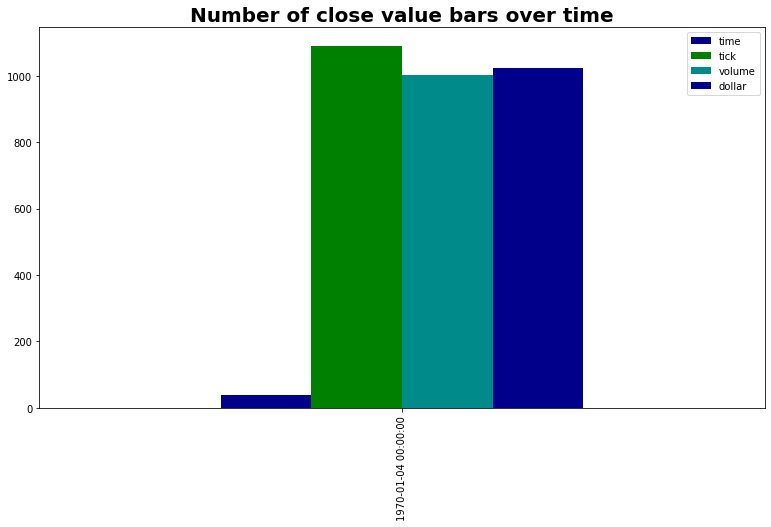

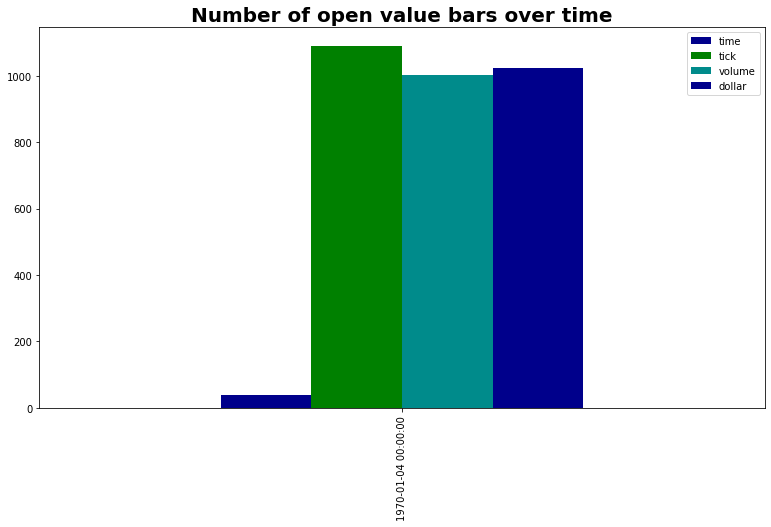

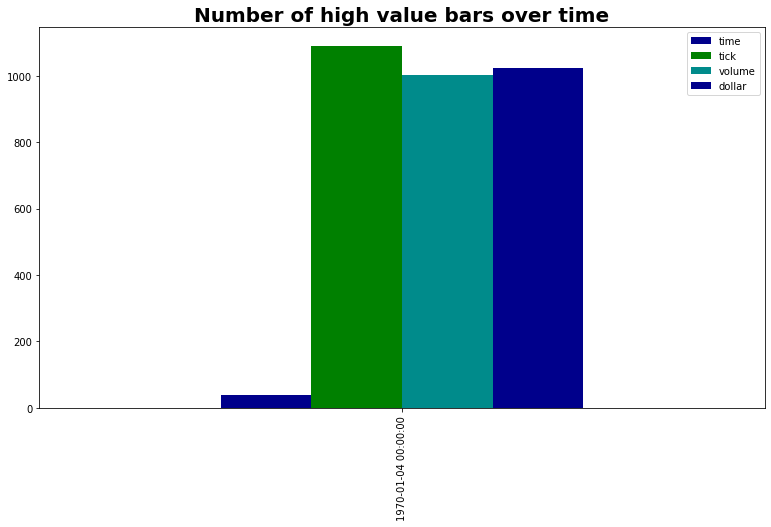

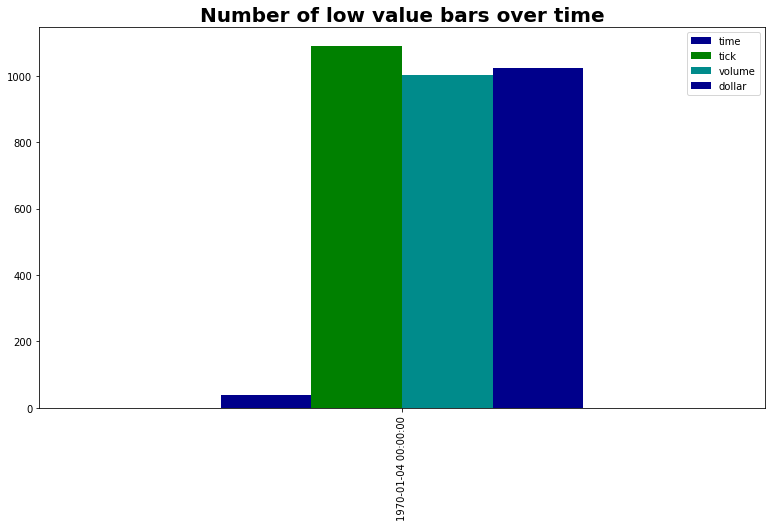

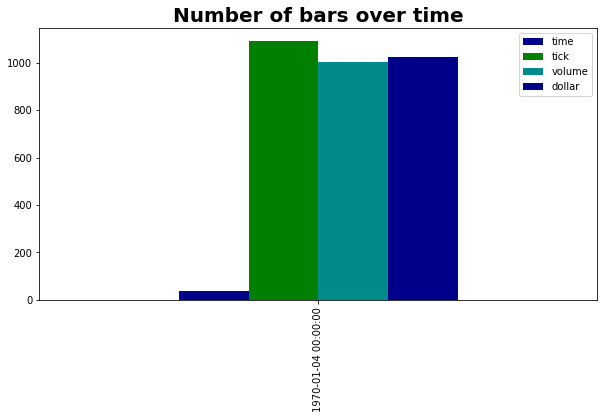

In [ ]:
# Plot the time series of the bar count

count_df.plot(kind='bar', figsize=[13, 7], color=('darkblue', 'green', 'darkcyan'))
plt.title('Number of close value bars over time', loc='center',
          fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.show()

open_count_df.plot(kind='bar', figsize=[13, 7],  color=('darkblue', 'green', 'darkcyan'))
plt.title('Number of open value bars over time', loc='center',
          fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.show()

high_count_df.plot(kind='bar', figsize=[13, 7],  color=('darkblue', 'green', 'darkcyan'))
plt.title('Number of high value bars over time', loc='center',
          fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.show()

low_count_df.plot(kind='bar', figsize=[13, 7],  color=('darkblue', 'green', 'darkcyan'))
plt.title('Number of low value bars over time', loc='center',
          fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.show()



**Task 3.
Compute the serial correlation of each bar type and
report back on which method has the lowest serial correlation.**


In [ ]:
# Computing the serial correlations

time_returns = np.log(time_bars['close']).diff().dropna()
tick_returns = np.log(tick_bars['close']).diff().dropna()
volume_returns = np.log(volume_bars['close']).diff().dropna()
dollar_returns = np.log(dollar_bars['close']).diff().dropna()

time_open_returns = np.log(time_bars['open']).diff().dropna()
tick_open_returns = np.log(tick_bars['open']).diff().dropna()
volume_open_returns = np.log(volume_bars['open']).diff().dropna()
dollar_open_returns = np.log(dollar_bars['open']).diff().dropna()

time_high_returns = np.log(time_bars['high']).diff().dropna()
tick_high_returns = np.log(tick_bars['high']).diff().dropna()
volume_high_returns = np.log(volume_bars['high']).diff().dropna()
dollar_high_returns = np.log(dollar_bars['high']).diff().dropna()

time_low_returns = np.log(time_bars['low']).diff().dropna()
tick_low_returns = np.log(tick_bars['low']).diff().dropna()
volume_low_returns = np.log(volume_bars['low']).diff().dropna()
dollar_low_returns = np.log(dollar_bars['low']).diff().dropna()



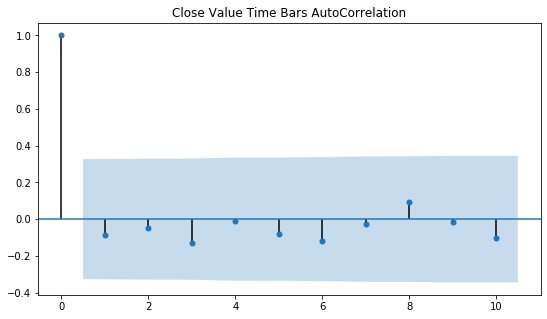

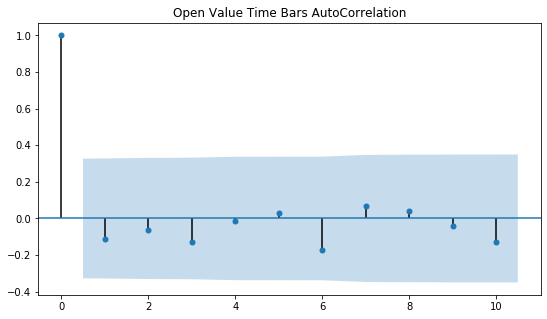

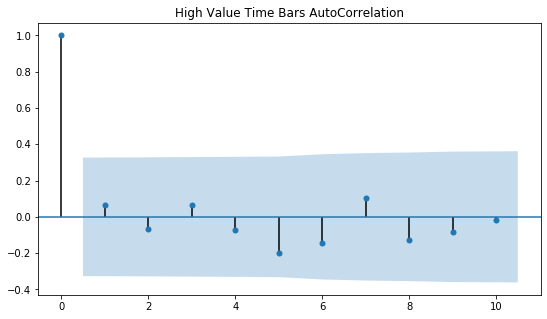

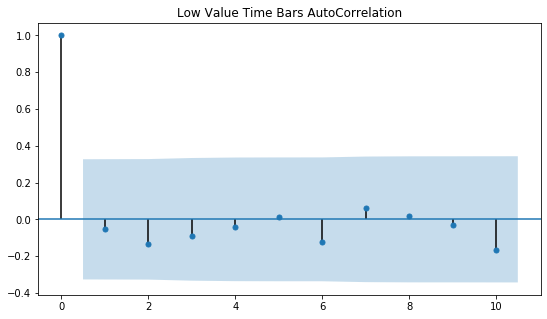

The highest auto-correlation of close value time bars is 0.17543147928753955
The highest auto-correlation of open value time bars is 0.21312611139191068
The highest auto-correlation of high value time bars is 0.19625684069651275
The highest auto-correlation of low value time bars is 0.21889301384281523


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [ ]:
# Plotting ACF charts

plot_acf(time_returns, lags=10)
plt.title('Close Value Time Bars AutoCorrelation')
plt.show()

plot_acf(time_open_returns, lags=10)
plt.title('Open Value Time Bars AutoCorrelation')
plt.show()

plot_acf(time_high_returns, lags=10)
plt.title('High Value Time Bars AutoCorrelation')
plt.show()

plot_acf(time_low_returns, lags=10)
plt.title('Low Value Time Bars AutoCorrelation')
plt.show()


# Computing highest auto-correlations
print('The highest auto-correlation of close value time bars is', max(acf(time_returns)[1:]))
print('The highest auto-correlation of open value time bars is', max(acf(time_open_returns)[1:]))
print('The highest auto-correlation of high value time bars is', max(acf(time_high_returns)[1:]))
print('The highest auto-correlation of low value time bars is', max(acf(time_low_returns)[1:]))



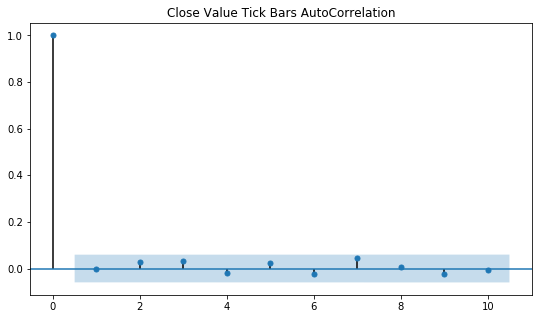

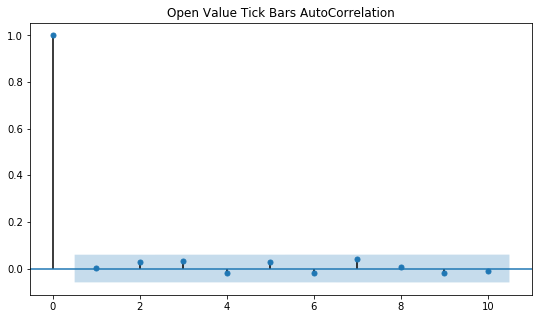

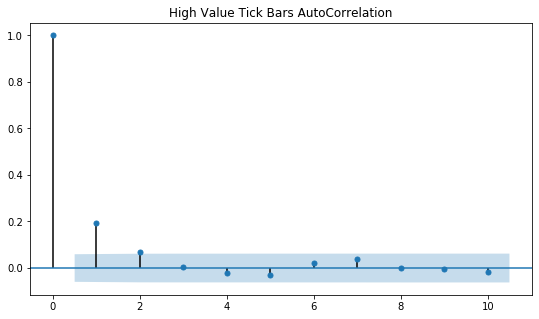

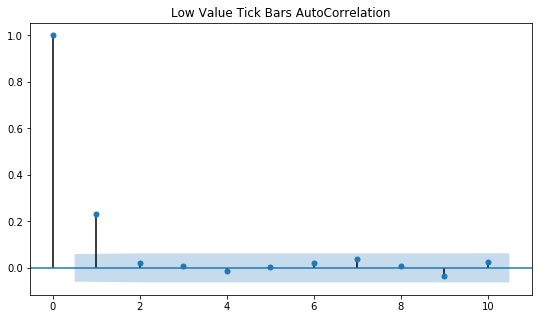

The highest auto-correlation of close value tick bars is 0.046016228105043425
The highest auto-correlation of open value tick bars is 0.04081518833844485
The highest auto-correlation of high value tick bars is 0.19151084132228557
The highest auto-correlation of low value tick bars is 0.23129891973598435


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [ ]:
# Plotting ACF charts

plot_acf(tick_returns, lags=10)
plt.title('Close Value Tick Bars AutoCorrelation')
plt.show()

plot_acf(tick_open_returns, lags=10)
plt.title('Open Value Tick Bars AutoCorrelation')
plt.show()

plot_acf(tick_high_returns, lags=10)
plt.title('High Value Tick Bars AutoCorrelation')
plt.show()

plot_acf(tick_low_returns, lags=10)
plt.title('Low Value Tick Bars AutoCorrelation')
plt.show()


# Computing highest auto-correlations
print('The highest auto-correlation of close value tick bars is', max(acf(tick_returns)[1:]))
print('The highest auto-correlation of open value tick bars is', max(acf(tick_open_returns)[1:]))
print('The highest auto-correlation of high value tick bars is', max(acf(tick_high_returns)[1:]))
print('The highest auto-correlation of low value tick bars is', max(acf(tick_low_returns)[1:]))



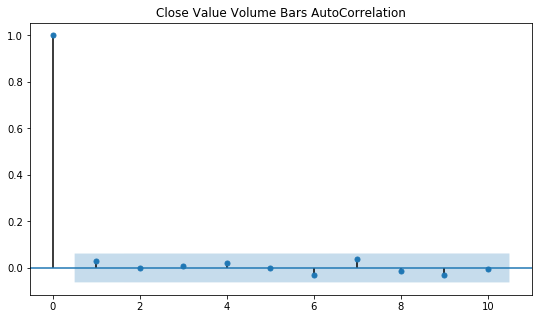

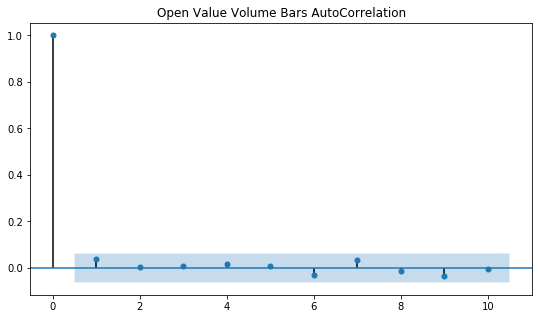

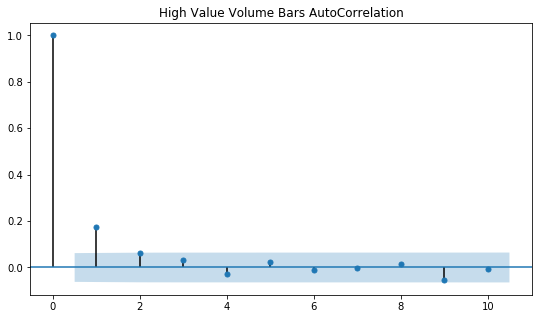

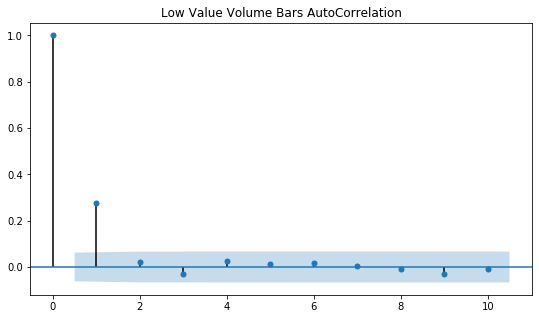

The highest auto-correlation of close value volume bars is 0.04790200430595728
The highest auto-correlation of open value volume bars is 0.047758490992865145
The highest auto-correlation of high value volume bars is 0.17483177160779997
The highest auto-correlation of low value volume bars is 0.276719643719107


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [ ]:
# Plotting ACF charts

plot_acf(volume_returns, lags=10)
plt.title('Close Value Volume Bars AutoCorrelation')
plt.show()

plot_acf(volume_open_returns, lags=10)
plt.title('Open Value Volume Bars AutoCorrelation')
plt.show()

plot_acf(volume_high_returns, lags=10)
plt.title('High Value Volume Bars AutoCorrelation')
plt.show()

plot_acf(volume_low_returns, lags=10)
plt.title('Low Value Volume Bars AutoCorrelation')
plt.show()


# Computing highest auto-correlations
print('The highest auto-correlation of close value volume bars is', max(acf(volume_returns)[1:]))
print('The highest auto-correlation of open value volume bars is', max(acf(volume_open_returns)[1:]))
print('The highest auto-correlation of high value volume bars is', max(acf(volume_high_returns)[1:]))
print('The highest auto-correlation of low value volume bars is', max(acf(volume_low_returns)[1:]))



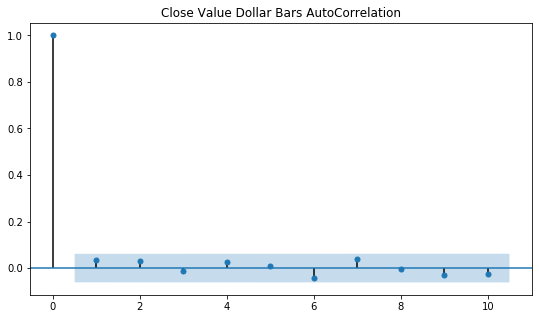

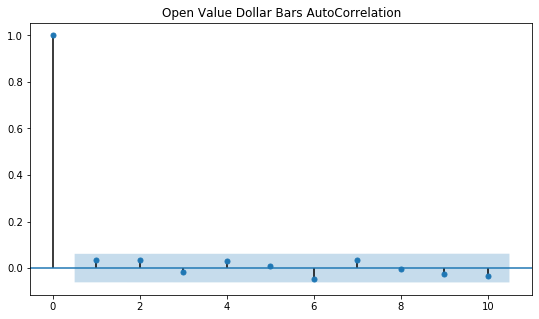

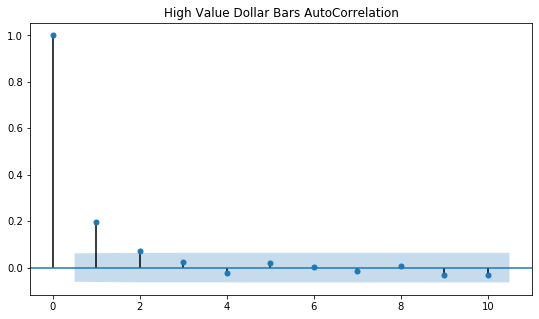

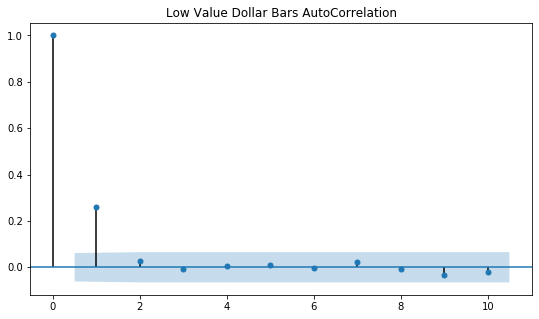

The highest auto-correlation of close value dollar bars is 0.05576876786777206
The highest auto-correlation of open value dollar bars is 0.0578091665631263
The highest auto-correlation of high value dollar bars is 0.1941763056548676
The highest auto-correlation of low value dollar bars is 0.25942626551716325


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [ ]:
# Plotting ACF charts

plot_acf(dollar_returns, lags=10)
plt.title('Close Value Dollar Bars AutoCorrelation')
plt.show()

plot_acf(dollar_open_returns, lags=10)
plt.title('Open Value Dollar Bars AutoCorrelation')
plt.show()

plot_acf(dollar_high_returns, lags=10)
plt.title('High Value Dollar Bars AutoCorrelation')
plt.show()

plot_acf(dollar_low_returns, lags=10)
plt.title('Low Value Dollar Bars AutoCorrelation')
plt.show()


# Computing highest auto-correlations
print('The highest auto-correlation of close value dollar bars is', max(acf(dollar_returns)[1:]))
print('The highest auto-correlation of open value dollar bars is', max(acf(dollar_open_returns)[1:]))
print('The highest auto-correlation of high value dollar bars is', max(acf(dollar_high_returns)[1:]))
print('The highest auto-correlation of low value dollar bars is', max(acf(dollar_low_returns)[1:]))



**Task 4.
Apply the Jarque-Bera normality test on returns from
the three bar types. What method achieves the lowest test statistic?**

In [ ]:
# Computing Jarque-Bera normality test results

print ('Test Statistics:')

print('\n')
print ('Close Time:', '\t', int(stats.jarque_bera(time_returns)[0]))
print ('Close Tick:', '\t', int(stats.jarque_bera(tick_returns)[0]))
print ('Close Volume:', int(stats.jarque_bera(volume_returns)[0]))
print ('Close Dollar:', int(stats.jarque_bera(dollar_returns)[0]))

print('\n')
print ('Open Time:', '\t', int(stats.jarque_bera(time_open_returns)[0]))
print ('Open Tick:', '\t', int(stats.jarque_bera(tick_open_returns)[0]))
print ('Open Volume:', int(stats.jarque_bera(volume_open_returns)[0]))
print ('Open Dollar:', int(stats.jarque_bera(dollar_open_returns)[0]))

print('\n')
print ('High Time:', '\t', int(stats.jarque_bera(time_high_returns)[0]))
print ('High Tick:', '\t', int(stats.jarque_bera(tick_high_returns)[0]))
print ('High Volume:', int(stats.jarque_bera(volume_high_returns)[0]))
print ('High Dollar:', int(stats.jarque_bera(dollar_high_returns)[0]))

print('\n')
print ('Low Time:', '\t', int(stats.jarque_bera(time_low_returns)[0]))
print ('Low Tick:', '\t', int(stats.jarque_bera(tick_low_returns)[0]))
print ('Low Volume:', int(stats.jarque_bera(volume_low_returns)[0]))
print ('Low Dollar:', int(stats.jarque_bera(dollar_low_returns)[0]))



Test Statistics:


Close Time: 	 11
Close Tick: 	 4521
Close Volume: 4911
Close Dollar: 11916


Open Time: 	 8
Open Tick: 	 4565
Open Volume: 5127
Open Dollar: 11958


High Time: 	 7
High Tick: 	 105449
High Volume: 35646
High Dollar: 37443


Low Time: 	 6
Low Tick: 	 24805
Low Volume: 18741
Low Dollar: 20855


**(optional). Standardize & Plot the Distributions**

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


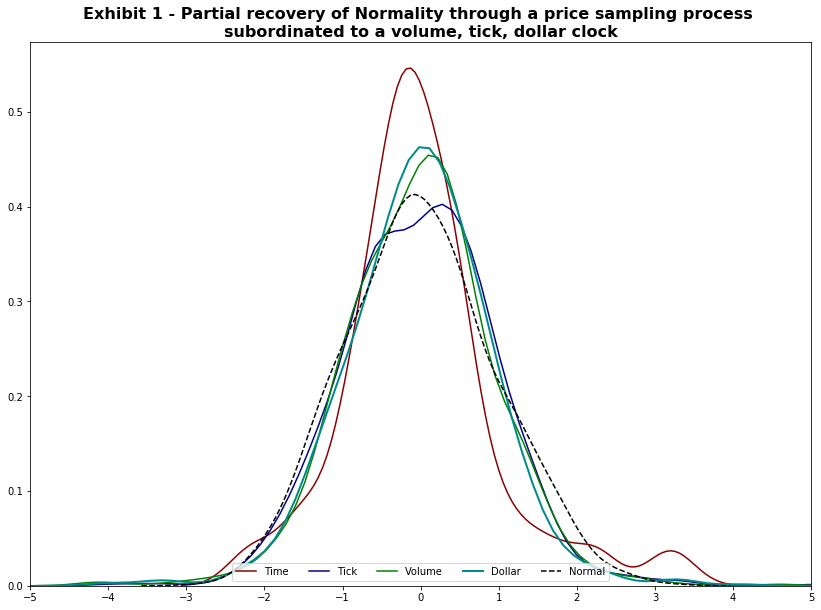

In [ ]:
# Calculate the differences
time_diff = time_returns
tick_diff = tick_returns
volume_diff = volume_returns
dollar_diff = dollar_returns

# Standardize the data
time_standard = (time_diff - time_diff.mean()) / time_diff.std()
tick_standard = (tick_diff - tick_diff.mean()) / tick_diff.std()
volume_standard = (volume_diff - volume_diff.mean()) / volume_diff.std()
dollar_standard = (dollar_diff - dollar_diff.mean()) / dollar_diff.std()

# Plot the Distributions
plt.figure(figsize=(14,10))
sns.kdeplot(time_standard, label="Time", bw=0.30, color='darkred')
sns.kdeplot(tick_standard, label="Tick", bw=0.25, color='darkblue')
sns.kdeplot(volume_standard, label="Volume", bw=0.25, color='green')
sns.kdeplot(dollar_standard, label="Dollar", bw=0.25, linewidth=2, color='darkcyan')

sns.kdeplot(np.random.normal(size=len(volume_returns)), label="Normal", color='black', linestyle="--")

plt.xticks(range(-5, 6))
plt.legend(loc=8, ncol=5)
plt.title('Exhibit 1 - Partial recovery of Normality through a price sampling process \nsubordinated to a volume, tick, dollar clock',
          loc='center', fontsize=16, fontweight="bold", fontname="Times New Roman")
plt.xlim(-5, 5)
plt.show()

